In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

## Подготовка и EDA

In [3]:
data = pd.read_csv('../data/Dataset3.csv')

In [4]:
data.head(100)


,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26700000.0,2017.0,19.165781,72.934534,3.0,3.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
96,60000000.0,1800.0,19.098821,72.832072,3.0,3.0,3.0,Ready to Move,Resale,3.0,Semi-Furnished,3.0,Flat
97,33500000.0,1540.0,19.123709,72.892867,3.0,3.0,1.0,NaN,New Property,1.0,Semi-Furnished,1.0,Flat
98,54000000.0,3018.0,19.174674,72.943104,4.0,5.0,1.0,NaN,New Property,1.0,Unfurnished,1.0,Flat


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [6]:
data.columns

Index(['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'Status', 'neworold', 'parking', 'Furnished_status', 'Lift',
       'type_of_building'],
      dtype='object')

In [7]:
data = data.rename(
    columns={
        'Bedrooms' : 'bedrooms',
        'Bathrooms' : 'bathrooms',
        'Balcony' : 'balcony',
        'Status' : 'status',
        'neworold' : 'new_or_old',
        'Furnished_status' : 'furnished_status',
        'Lift' : 'lift'})
        
        

In [8]:
data.columns

Index(['price', 'area', 'latitude', 'longitude', 'bedrooms', 'bathrooms',
       'balcony', 'status', 'new_or_old', 'parking', 'furnished_status',
       'lift', 'type_of_building'],
      dtype='object')

In [9]:
data.describe()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


In [10]:
data['price']= data['price'].astype(int)
data['bedrooms']= data['bedrooms'].astype(int)
data['bathrooms']= data['bathrooms'].astype(int)
data['balcony']= data['balcony'].astype(int)
data['parking']= data['parking'].astype(int)
data['lift']= data['lift'].astype(int)
data['area']= data['area'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   int32  
 1   area              6255 non-null   int32  
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   bedrooms          6255 non-null   int32  
 5   bathrooms         6255 non-null   int32  
 6   balcony           6255 non-null   int32  
 7   status            5774 non-null   object 
 8   new_or_old        6255 non-null   object 
 9   parking           6255 non-null   int32  
 10  furnished_status  3600 non-null   object 
 11  lift              6255 non-null   int32  
 12  type_of_building  6255 non-null   object 
dtypes: float64(2), int32(7), object(4)
memory usage: 464.4+ KB


In [12]:
data['status']= data['status'].fillna(-1)
data['furnished_status']= data['furnished_status'].fillna(-1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   int32  
 1   area              6255 non-null   int32  
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   bedrooms          6255 non-null   int32  
 5   bathrooms         6255 non-null   int32  
 6   balcony           6255 non-null   int32  
 7   status            6255 non-null   object 
 8   new_or_old        6255 non-null   object 
 9   parking           6255 non-null   int32  
 10  furnished_status  6255 non-null   object 
 11  lift              6255 non-null   int32  
 12  type_of_building  6255 non-null   object 
dtypes: float64(2), int32(7), object(4)
memory usage: 464.4+ KB


In [14]:
data.describe()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


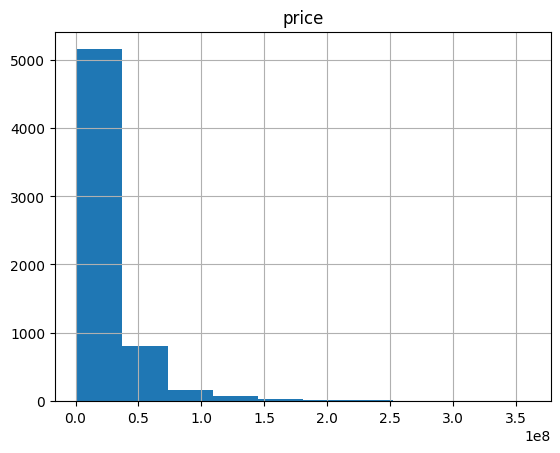

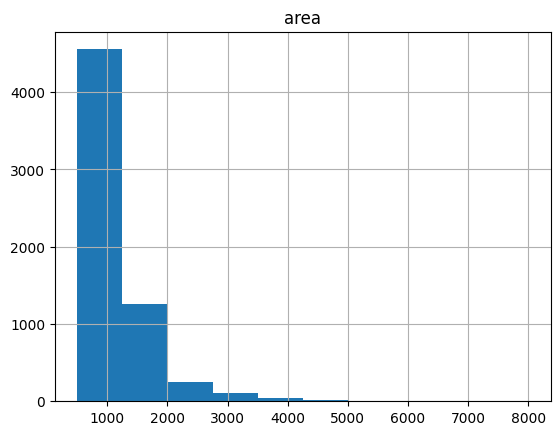

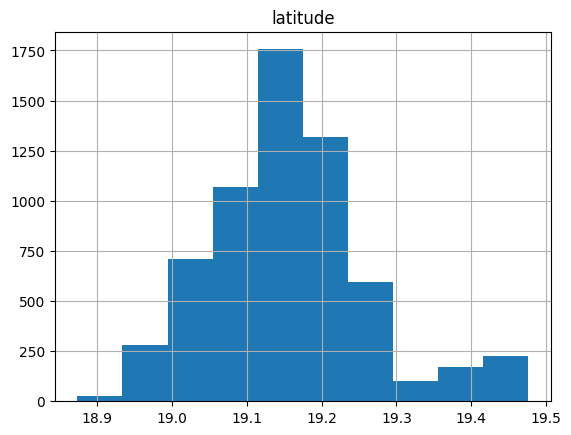

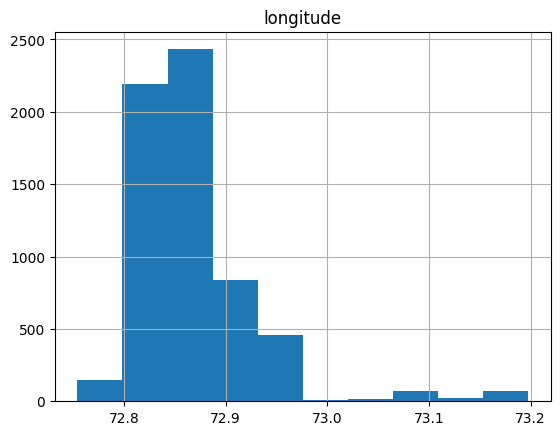

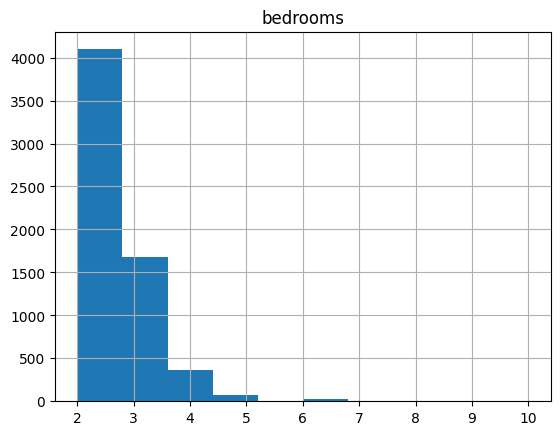

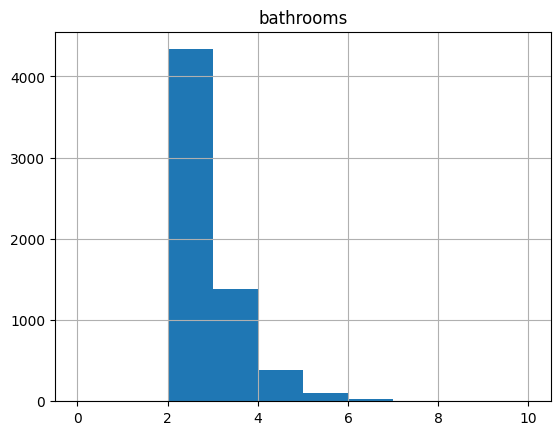

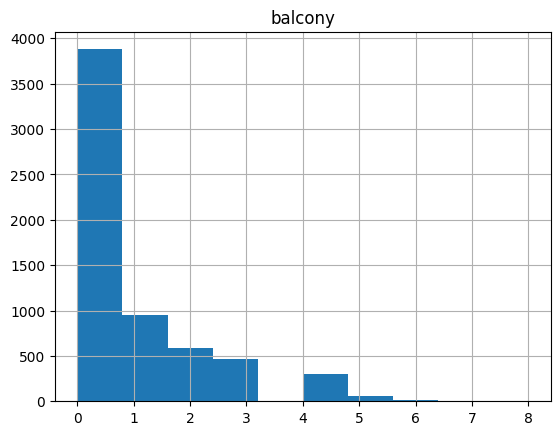

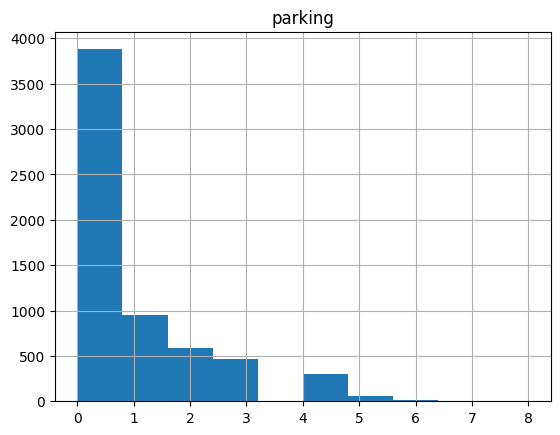

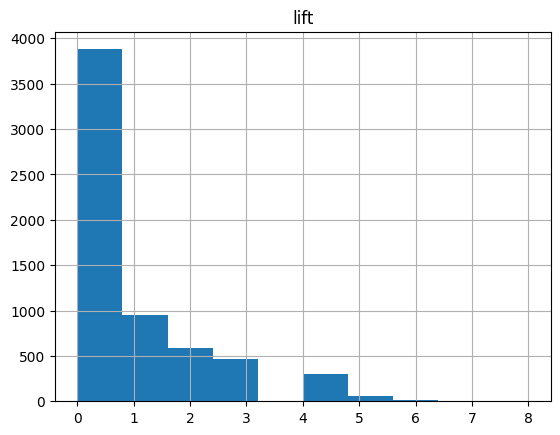

In [15]:
columns = ['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']
for column in columns:
    data.hist(column)

In [16]:
outlier = data[['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']]
outlier

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
0,22400000,629,19.032800,72.896357,2,2,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,2,2
4,13500000,1090,19.177555,72.849887,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1
6252,20000000,750,19.144320,72.824111,2,2,0,0,0
6253,11000000,700,19.047201,72.872225,2,2,0,0,0


In [17]:
Q1 = outlier.quantile(0.25)
Q1

price        1.300000e+07
area         8.465000e+02
latitude     1.908151e+01
longitude    7.283293e+01
bedrooms     2.000000e+00
bathrooms    2.000000e+00
balcony      0.000000e+00
parking      0.000000e+00
lift         0.000000e+00
Name: 0.25, dtype: float64

In [18]:
Q3 = outlier.quantile(0.75)
Q3

price        3.000000e+07
area         1.300000e+03
latitude     1.921305e+01
longitude    7.288469e+01
bedrooms     3.000000e+00
bathrooms    3.000000e+00
balcony      1.000000e+00
parking      1.000000e+00
lift         1.000000e+00
Name: 0.75, dtype: float64

In [19]:
IQR = Q3-Q1

In [20]:
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
0,22400000,629,19.032800,72.896357,2,2,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,2,2
4,13500000,1090,19.177555,72.849887,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,0,0
6251,22000000,1400,19.221920,72.854250,3,3,1,1,1
6252,20000000,750,19.144320,72.824111,2,2,0,0,0
6253,11000000,700,19.047201,72.872225,2,2,0,0,0


In [21]:
index_list = list(data_filtered.index.values)

In [22]:
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,Under Construction,New Property,0,-1,0,Flat
1,35000000,974,19.032800,72.896357,3,2,0,Under Construction,New Property,0,-1,0,Flat
2,31700000,968,19.085600,72.909277,3,3,0,Under Construction,New Property,0,-1,0,Flat
3,18700000,629,19.155756,72.846862,2,2,2,Ready to Move,New Property,2,-1,2,Flat
4,13500000,1090,19.177555,72.849887,2,2,0,-1,New Property,0,Unfurnished,0,Flat


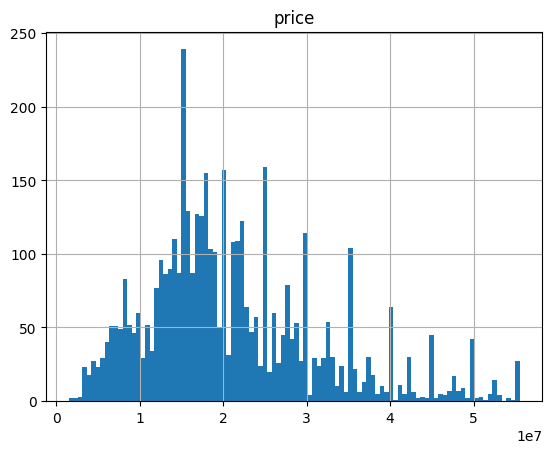

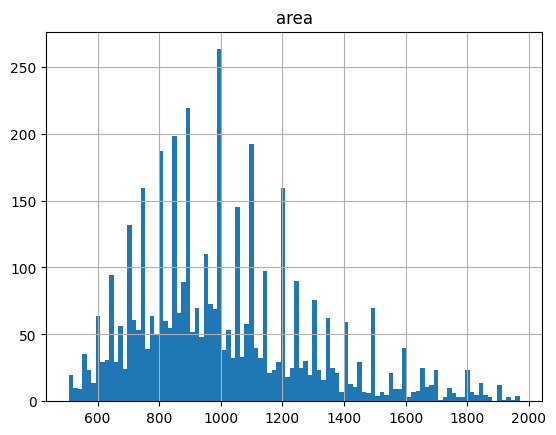

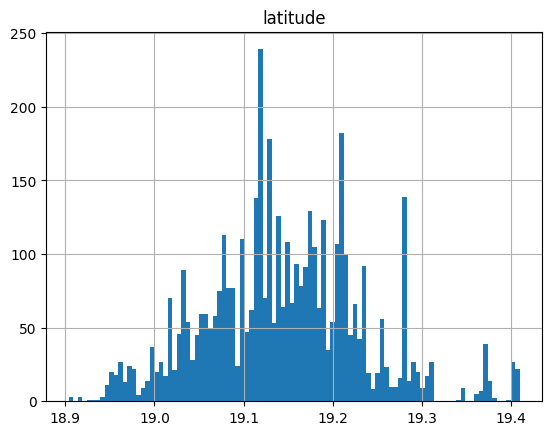

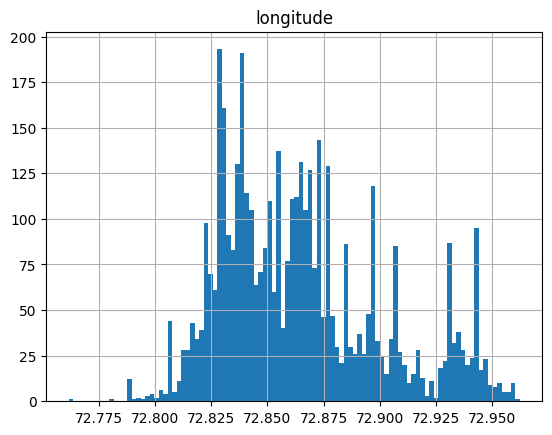

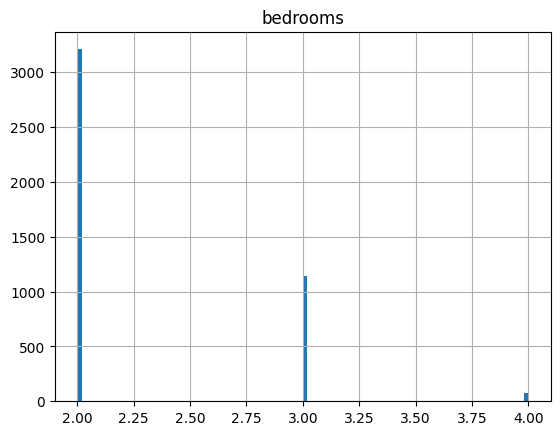

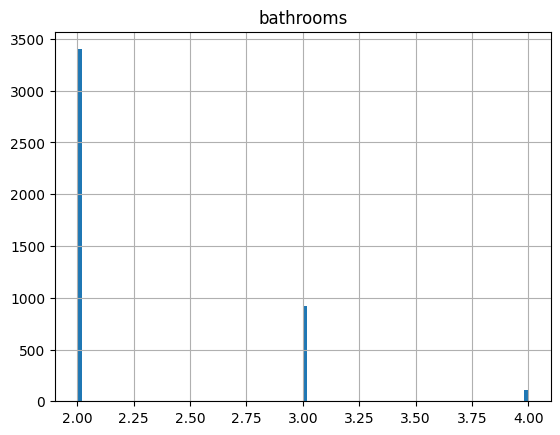

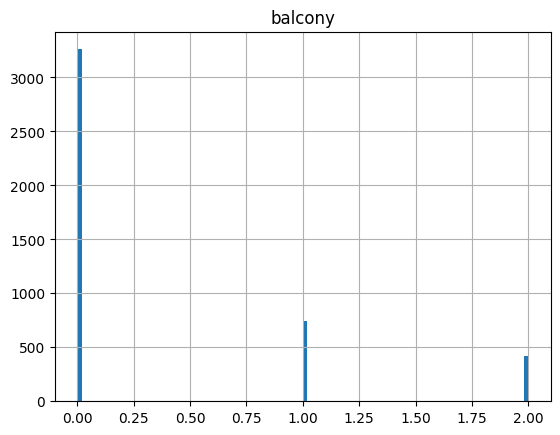

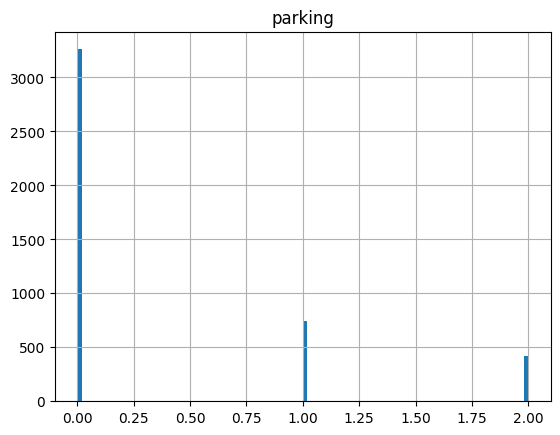

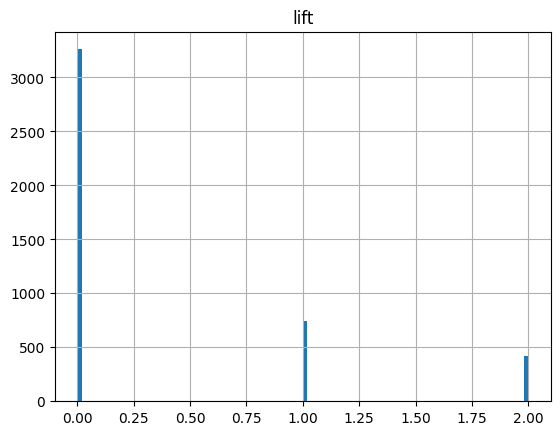

In [23]:
filtered_outlier = data_filtered[['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

[[<Axes: title={'center': 'price'}>]]
[[<Axes: title={'center': 'price'}>]]


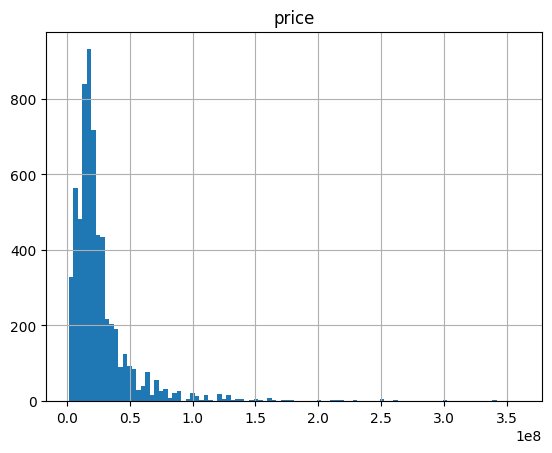

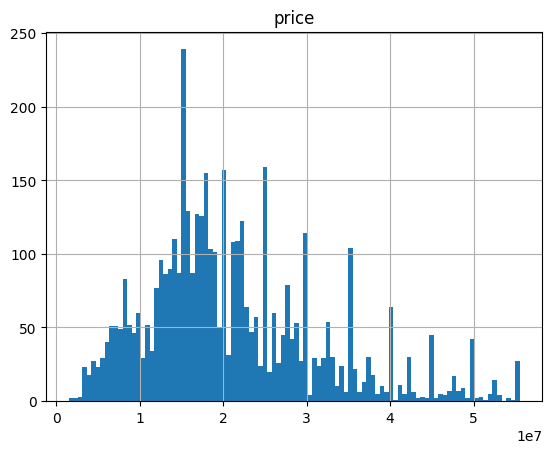

In [24]:
print (data.hist('price', bins=100));
print (data_filtered.hist('price', bins=100));

[[<Axes: title={'center': 'area'}>]]
[[<Axes: title={'center': 'area'}>]]


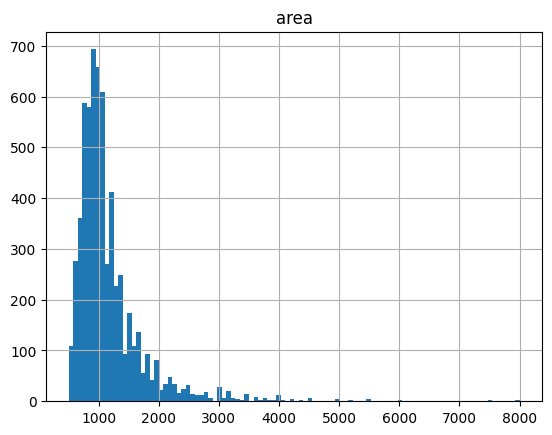

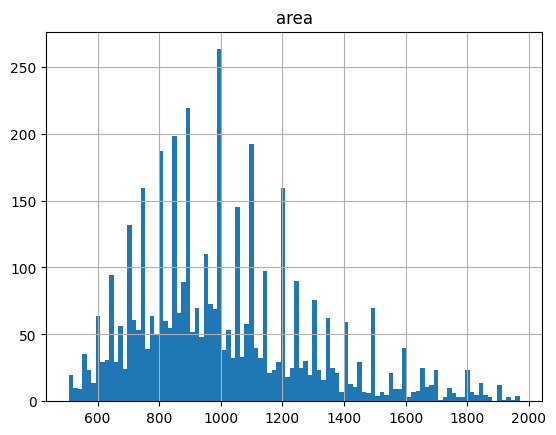

In [25]:
print (data.hist('area', bins=100));
print (data_filtered.hist('area', bins=100));

In [26]:
data_filtered[['price','area','latitude','longitude','bedrooms','bathrooms','balcony','parking','lift']].corr()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
price,1.000000,0.506439,-0.531531,-0.138363,0.431067,0.437313,0.039046,0.039046,0.039046
area,0.506439,1.000000,-0.055543,0.047363,0.616419,0.565345,0.137782,0.137782,0.137782
latitude,-0.531531,-0.055543,1.000000,-0.051398,-0.026275,-0.050603,0.010959,0.010959,0.010959
longitude,-0.138363,0.047363,-0.051398,1.000000,0.027393,-0.006743,0.028379,0.028379,0.028379
bedrooms,0.431067,0.616419,-0.026275,0.027393,1.000000,0.726565,0.009401,0.009401,0.009401
bathrooms,0.437313,0.565345,-0.050603,-0.006743,0.726565,1.000000,0.015595,0.015595,0.015595
balcony,0.039046,0.137782,0.010959,0.028379,0.009401,0.015595,1.000000,1.000000,1.000000
parking,0.039046,0.137782,0.010959,0.028379,0.009401,0.015595,1.000000,1.000000,1.000000
lift,0.039046,0.137782,0.010959,0.028379,0.009401,0.015595,1.000000,1.000000,1.000000


In [27]:
# Создание переменной с типом жилья и средней ценой
avg_price = data_filtered.pivot_table(index='type_of_building', values='price', aggfunc='mean')
avg_price.sort_values(ascending=False ,by='type_of_building')

,price
type_of_building,
Individual House,2.084054e+07
Flat,2.122883e+07


In [28]:
# Создание переменной с типом и количеством статусов постройки
ads = data_filtered.pivot_table(index='type_of_building', values='status', aggfunc='count')
ads = ads.sort_values(ascending=False, by ='status' )
ads = ads.reset_index()
ads

,type_of_building,status
0,Flat,4114
1,Individual House,314


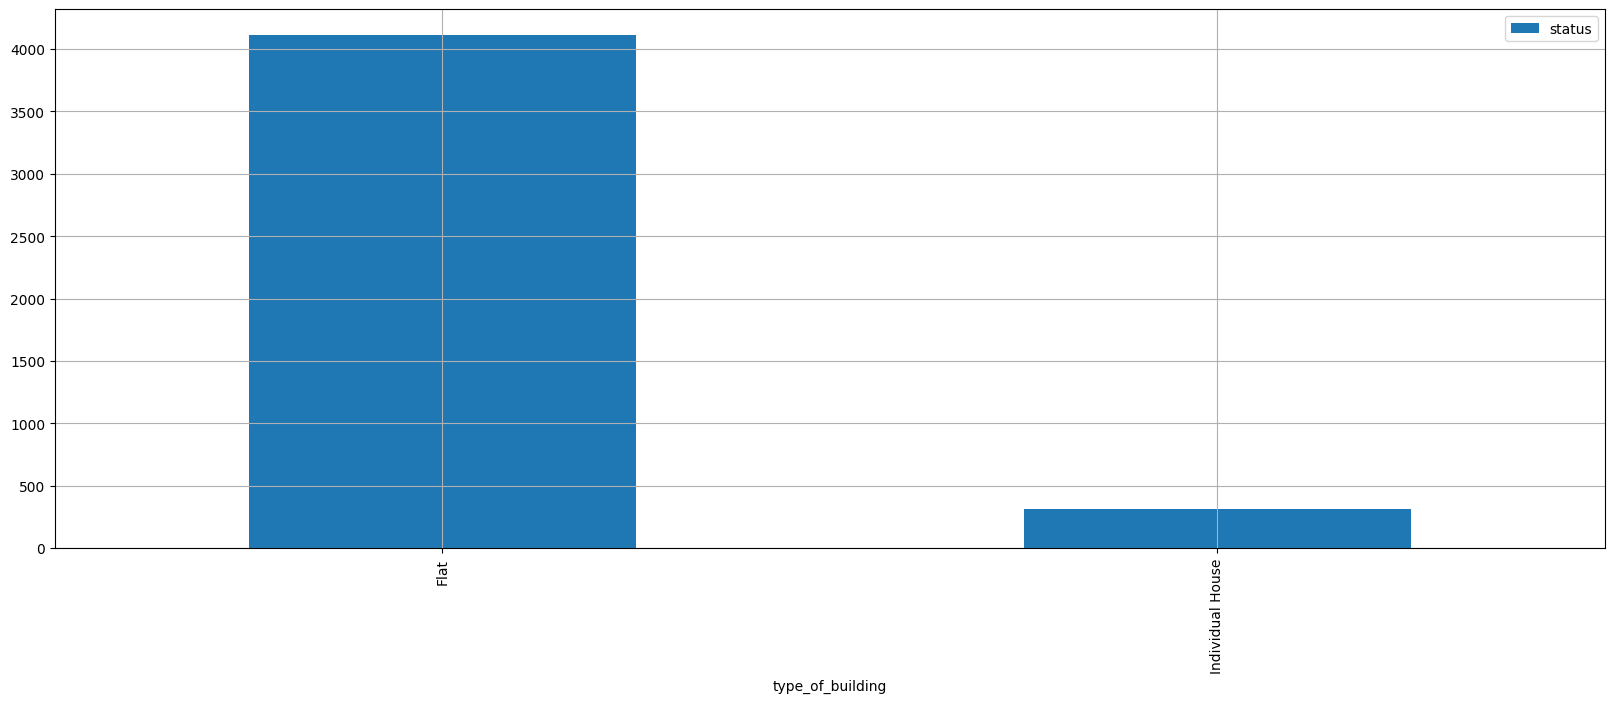

In [29]:
ads.plot(grid=True, figsize=(20, 7), kind = 'bar', x='type_of_building',y='status');

In [30]:
Flat = data_filtered.query('type_of_building == "Flat"')
IH = data_filtered.query('type_of_building == "Individual House"')

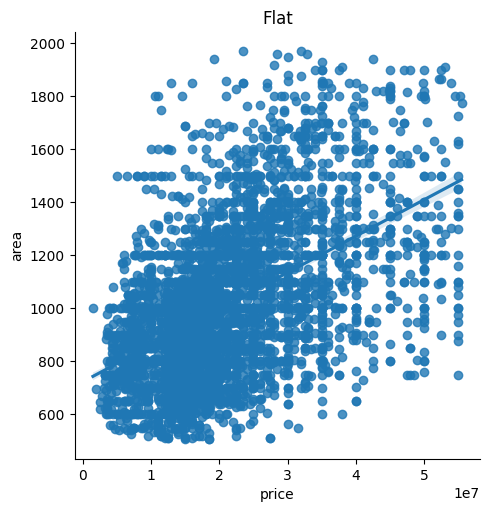

In [31]:
sns.lmplot(x='price', y = 'area',data = Flat);
plt.title("Flat");

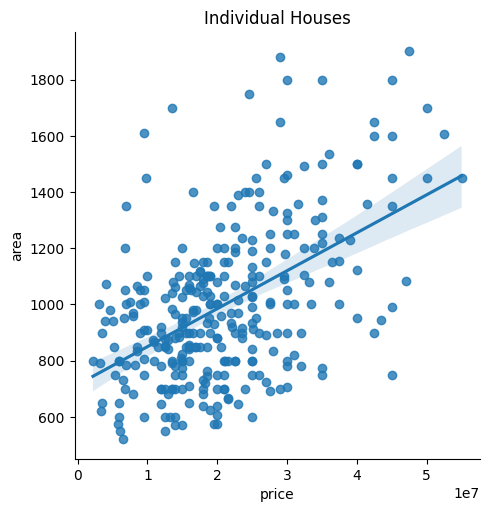

In [32]:
sns.lmplot(x='price', y = 'area',data = IH);
plt.title("Individual Houses");

In [33]:
area_flat = Flat[['price','area']]
corr_flat = area_flat.corr()
area_IH = IH[['price','area']]
corr_IH = area_IH.corr()

In [34]:
round(corr_flat,3)

,price,area
price,1.000,0.506
area,0.506,1.000


In [35]:
round(corr_IH,3)

,price,area
price,1.000,0.514
area,0.514,1.000


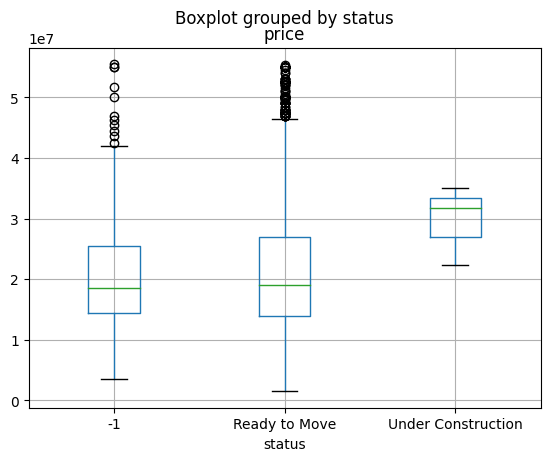

In [36]:
data_filtered.boxplot(by='status',column='price');

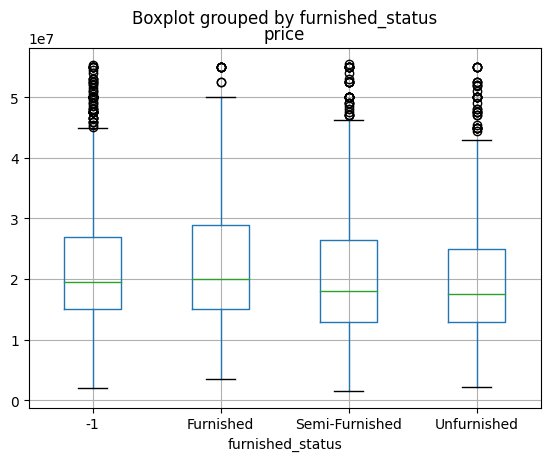

In [37]:
data_filtered.boxplot(by='furnished_status',column='price');

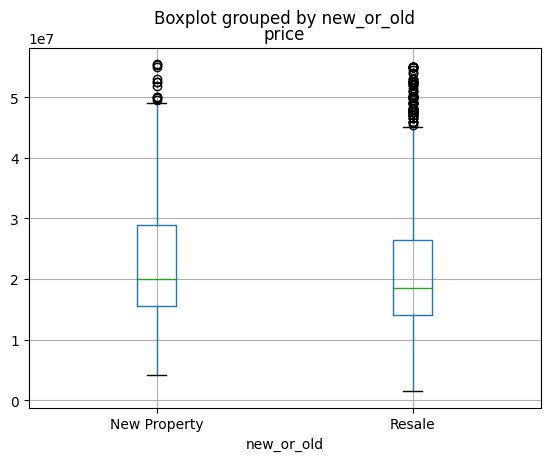

In [38]:
data_filtered.boxplot(by='new_or_old',column='price');

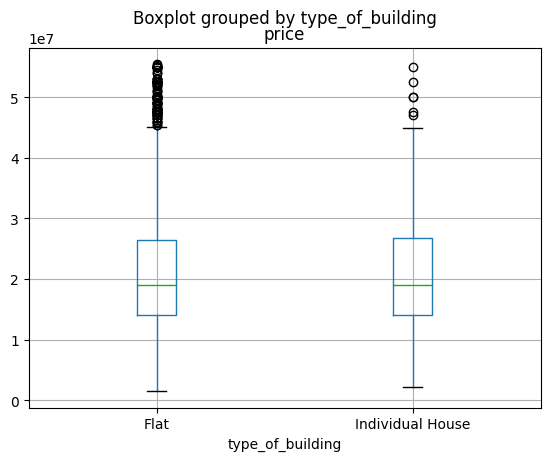

In [39]:
data_filtered.boxplot(by='type_of_building',column='price');

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   int32  
 1   area              6255 non-null   int32  
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   bedrooms          6255 non-null   int32  
 5   bathrooms         6255 non-null   int32  
 6   balcony           6255 non-null   int32  
 7   status            6255 non-null   object 
 8   new_or_old        6255 non-null   object 
 9   parking           6255 non-null   int32  
 10  furnished_status  6255 non-null   object 
 11  lift              6255 non-null   int32  
 12  type_of_building  6255 non-null   object 
dtypes: float64(2), int32(7), object(4)
memory usage: 464.4+ KB


In [41]:
data_filtered["status"].unique()

array(['Under Construction', 'Ready to Move', -1], dtype=object)

Заменим  Ready to Move на 1 , а Under Construction на 0

In [42]:
data_filtered.status[data_filtered.status == 'Ready to Move'] = 1
data_filtered.status[data_filtered.status == 'Under Construction'] = 0
data_filtered

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,New Property,0,-1,0,Flat
1,35000000,974,19.032800,72.896357,3,2,0,0,New Property,0,-1,0,Flat
2,31700000,968,19.085600,72.909277,3,3,0,0,New Property,0,-1,0,Flat
3,18700000,629,19.155756,72.846862,2,2,2,1,New Property,2,-1,2,Flat
4,13500000,1090,19.177555,72.849887,2,2,0,-1,New Property,0,Unfurnished,0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,1,Resale,0,Semi-Furnished,0,Flat
6251,22000000,1400,19.221920,72.854250,3,3,1,1,Resale,1,Unfurnished,1,Flat
6252,20000000,750,19.144320,72.824111,2,2,0,1,Resale,0,-1,0,Flat
6253,11000000,700,19.047201,72.872225,2,2,0,1,Resale,0,Furnished,0,Flat


In [43]:
data_filtered["furnished_status"].unique()

array([-1, 'Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

Заменим  Furnished на 2 , Semi-Furnished на 1, а Unfurnished на 0

In [44]:
data_filtered.furnished_status[data_filtered.furnished_status == 'Furnished'] = 2
data_filtered.furnished_status[data_filtered.furnished_status == 'Semi-Furnished'] = 1
data_filtered.furnished_status[data_filtered.furnished_status == 'Unfurnished'] = 0
data_filtered

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,New Property,0,-1,0,Flat
1,35000000,974,19.032800,72.896357,3,2,0,0,New Property,0,-1,0,Flat
2,31700000,968,19.085600,72.909277,3,3,0,0,New Property,0,-1,0,Flat
3,18700000,629,19.155756,72.846862,2,2,2,1,New Property,2,-1,2,Flat
4,13500000,1090,19.177555,72.849887,2,2,0,-1,New Property,0,0,0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,1,Resale,0,1,0,Flat
6251,22000000,1400,19.221920,72.854250,3,3,1,1,Resale,1,0,1,Flat
6252,20000000,750,19.144320,72.824111,2,2,0,1,Resale,0,-1,0,Flat
6253,11000000,700,19.047201,72.872225,2,2,0,1,Resale,0,2,0,Flat


In [45]:
data_filtered["new_or_old"].unique()

array(['New Property', 'Resale'], dtype=object)

Заменим  New Property на 1 , Resale на 0

In [46]:
data_filtered.new_or_old[data_filtered.new_or_old == 'New Property'] = 1
data_filtered.new_or_old[data_filtered.new_or_old == 'Resale'] = 0
data_filtered

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,-1,0,Flat
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,-1,0,Flat
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,-1,0,Flat
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,-1,2,Flat
4,13500000,1090,19.177555,72.849887,2,2,0,-1,1,0,0,0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,1,0,0,1,0,Flat
6251,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,Flat
6252,20000000,750,19.144320,72.824111,2,2,0,1,0,0,-1,0,Flat
6253,11000000,700,19.047201,72.872225,2,2,0,1,0,0,2,0,Flat


In [47]:
data_filtered["type_of_building"].unique()

array(['Flat', 'Individual House'], dtype=object)

Заменим Flat на 1, а Individual House на 2

In [48]:
data_filtered.type_of_building[data_filtered.type_of_building == 'Flat'] = 1
data_filtered.type_of_building[data_filtered.type_of_building == 'Individual House'] = 2
data_filtered

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,-1,0,1
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,-1,0,1
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,-1,0,1
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,-1,2,1
4,13500000,1090,19.177555,72.849887,2,2,0,-1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000,810,19.138320,72.810020,2,2,0,1,0,0,1,0,1
6251,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,1
6252,20000000,750,19.144320,72.824111,2,2,0,1,0,0,-1,0,1
6253,11000000,700,19.047201,72.872225,2,2,0,1,0,0,2,0,1


## Выделение целевых признаков и предикторов, разбиение данных на обучающую и тестовую выборки

In [49]:
y = data_filtered["price"]
X = data_filtered.drop(["price"], axis=1)

In [50]:
y

0       22400000
1       35000000
2       31700000
3       18700000
4       13500000
          ...   
6250    19500000
6251    22000000
6252    20000000
6253    11000000
6254    15000000
Name: price, Length: 4428, dtype: int32

In [51]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,new_or_old,parking,furnished_status,lift,type_of_building
0,629,19.032800,72.896357,2,2,0,0,1,0,-1,0,1
1,974,19.032800,72.896357,3,2,0,0,1,0,-1,0,1
2,968,19.085600,72.909277,3,3,0,0,1,0,-1,0,1
3,629,19.155756,72.846862,2,2,2,1,1,2,-1,2,1
4,1090,19.177555,72.849887,2,2,0,-1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,810,19.138320,72.810020,2,2,0,1,0,0,1,0,1
6251,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,1
6252,750,19.144320,72.824111,2,2,0,1,0,0,-1,0,1
6253,700,19.047201,72.872225,2,2,0,1,0,0,2,0,1


In [52]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3542, 12), (3542,), (886, 12), (886,))

## Линейная регрессия

In [54]:
def metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [55]:
X_train_area = X_train['area'].values.reshape(-1,1)
X_test_area = X_test['area'].values.reshape(-1,1)
parameters = {'alpha': np.arange(0, 1.1, 0.1)}

In [56]:
lr = LinearRegression().fit(X_train_area, y_train)
y_pred = lr.predict(X_test_area)

In [57]:
metrics(y_test, y_pred)

MAE: 6910743.568355804
MSE: 81216195799213.17
RMSE: 9012002.873901738
MAPE: 0.6717820172440352
R^2: 0.2789380424207192


In [58]:
# L2
ridge = GridSearchCV(Ridge(),parameters).fit(X_train_area, y_train)
y_pred = ridge.predict(X_test_area)

In [59]:
metrics(y_test, y_pred)

MAE: 6910743.568674911
MSE: 81216195808048.3
RMSE: 9012002.874391925
MAPE: 0.6717820173599677
R^2: 0.27893804234227826


In [60]:
# L1
lasso = GridSearchCV(Lasso(),parameters).fit(X_train_area, y_train)
y_pred = lasso.predict(X_test_area)

In [61]:
metrics(y_test, y_pred)

MAE: 6910743.568416851
MSE: 81216195800903.33
RMSE: 9012002.873995509
MAPE: 0.6717820172662132
R^2: 0.2789380424057134


## Множественная регрессия

In [62]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [63]:
metrics(y_test, y_pred)

MAE: 4925639.007682552
MSE: 45097610264308.81
RMSE: 6715475.430995843
MAPE: 0.5444101320540373
R^2: 0.5996097721724979


In [64]:
# L1
lasso = GridSearchCV(Lasso(),parameters).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [65]:
metrics(y_test, y_pred)

MAE: 4925639.477975982
MSE: 45097635971317.24
RMSE: 6715477.345008115
MAPE: 0.544410095009527
R^2: 0.5996095439378997


In [66]:
# L2
ridge = GridSearchCV(Ridge(),parameters).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [67]:
metrics(y_test, y_pred)

MAE: 4926394.616420592
MSE: 45127216885309.22
RMSE: 6717679.427101983
MAPE: 0.5443794918722665
R^2: 0.5993469156340232


## Полиномиальная регрессия

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
p = PolynomialFeatures()
X_train_p = p.fit_transform(X_train)
X_test_p = p.fit_transform(X_test)
parameters = {'alpha': np.arange(0, 1.1, 0.1)}

In [70]:
lr = LinearRegression().fit(X_train_p, y_train)
y_pred = lr.predict(X_test_p)
metrics(y_test,y_pred)
print("\n\n")
lasso_optimal = GridSearchCV(Lasso(),parameters).fit(X_train_p,y_train)
y_pred = lasso_optimal.predict(X_test_p)
metrics(y_test,y_pred)
print("\n\n")
ridge_optimal = GridSearchCV(Ridge(),parameters).fit(X_train_p,y_train)
y_pred = ridge_optimal.predict(X_test_p)
metrics(y_test,y_pred)

MAE: 4716454.679667109
MSE: 41597592180106.54
RMSE: 6449619.537624412
MAPE: 0.534939207311106
R^2: 0.6306839916249465



MAE: 4921555.176317305
MSE: 44663538628111.08
RMSE: 6683078.529249157
MAPE: 0.5432724572683681
R^2: 0.6034635914833675



MAE: 4711894.066309255
MSE: 41569094136662.07
RMSE: 6447409.87813417
MAPE: 0.5342524761554072
R^2: 0.6309370058764887


## Пайплайн

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

In [72]:
Input = [
    ('StandardScaler',StandardScaler()),
    ('Polynomial',PolynomialFeatures()),
    ('model',LinearRegression())
]

pipeline = Pipeline(Input)
pipeline

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [74]:
y_pipeline_pred = pipeline.predict(X_test)
metrics(y_test,y_pipeline_pred)

MAE: 4717058.424379232
MSE: 41585395679931.75
RMSE: 6448673.947404361
MAPE: 0.5352017017540406
R^2: 0.6307922758434463


## Реализация метрик по формулам

In [75]:
def MSE(y_true: np.ndarray, y_pred: np.ndarray): 
    return np.sum((y_true - y_pred)**2) / y_true.shape[0]

def MAE(y_true: np.ndarray, y_pred: np.ndarray):
    return np.sum(np.absolute(y_true - y_pred)) / y_true.shape[0]

def RMSE(y_true: np.ndarray, y_pred: np.ndarray): 
    return sqrt(MSE(y_true,y_pred))

def MAPE(y_true: np.ndarray, y_pred: np.ndarray): 
    return np.sum(np.absolute((y_true - y_pred) / y_true)) / y_true.shape[0]

def R2(y_true: np.ndarray, y_pred: np.ndarray):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [82]:
# test
A = np.array([23, 14, 2, 3, 56, 32, 12, 67, 54, 32])
B = np.array([56, 23, 13, 15, 76, 54, 21, 5, 6, 25])
print("Sklearn metrics")
metrics(A,B)

print('\nMy metrics')
print(f'MAE = {MAE(A,B)}')
print(f'MSE = {MSE(A,B)}')
print(f'RMSE = {RMSE(A,B)}')
print(f'MAPE = {MAPE(A,B)}')
print(f'R^2 = {R2(A,B)}')
print('')

Sklearn metrics
MAE: 23.3
MSE: 859.7
RMSE: 29.320641193534634
MAPE: 1.2411806730654849
R^2: -0.8028730208661004

My metrics
MAE = 23.3
MSE = 859.7
RMSE = 29.320641193534634
MAPE = 1.5405294631912898
R^2 = -0.8028730208661004



## One_Hot Кодирование, ElasticNet

In [77]:
data_hot = pd.get_dummies(data.drop('area',axis=1),dtype=int)
Y_hot = data_hot['price']
X_hot = data_hot[data_hot.describe().columns].drop('price',axis=1)

X_train_hot, X_test_hot, Y_train_hot, Y_test_hot = train_test_split(X_hot,Y_hot,test_size=0.2)

X_train_hot.shape, Y_train_hot.shape, X_test_hot.shape, Y_test_hot.shape

((5004, 18), (5004,), (1251, 18), (1251,))

In [78]:
scaler = StandardScaler()
scaler.fit(X_train_hot)

StandardScaler()

In [79]:
parameters = {'alpha': np.arange(0.1, 1.1, 0.3)}

elastic_model = GridSearchCV(ElasticNet(),parameters).fit(X_train_hot,Y_train_hot)
y_pred = elastic_model.predict(X_test_hot)
metrics(Y_test_hot,y_pred)

MAE: 11546227.666777244
MSE: 481267816852495.25
RMSE: 21937817.048478074
MAPE: 0.7667596628854757
R^2: 0.43139528285644013


In [80]:
parameters = {'alpha': np.arange(0.1, 1.1, 0.3)}

lasso_model = GridSearchCV(Lasso(),parameters).fit(X_train_hot,Y_train_hot)
y_pred = elastic_model.predict(X_test_hot)
metrics(Y_test_hot,y_pred)

MAE: 11546227.666777244
MSE: 481267816852495.25
RMSE: 21937817.048478074
MAPE: 0.7667596628854757
R^2: 0.43139528285644013


In [81]:
parameters = {'alpha': np.arange(0.1, 1.1, 0.3)}

ridge_model = GridSearchCV(Ridge(),parameters).fit(X_train_hot,Y_train_hot)
y_pred = elastic_model.predict(X_test_hot)
metrics(Y_test_hot,y_pred)

MAE: 11546227.666777244
MSE: 481267816852495.25
RMSE: 21937817.048478074
MAPE: 0.7667596628854757
R^2: 0.43139528285644013
